# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: ** Trata-se de um problema de **Classificação**, dado que a variável que iremos predizer é discreta (neste caso binária), admitindo dois valores, alunos que que necessitam de intervenção e os que não necessitam. Portanto, trata-se de classificar os alunos nestas duas categorias.

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
print "Os dados dos estudantes foram lidos com êxito!"

Os dados dos estudantes foram lidos com êxito!


### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [2]:
# Inspecao visual
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
# Verificando NA's
student_data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
passed        False
dtype: bool

In [4]:
# TODO: Calcule o número de estudantes
n_students = len(student_data.index)

# TODO: Calcule o número de atributos
n_features = len(student_data.columns[:-1])

# TODO: Calcule o número de alunos aprovados
n_passed = (student_data['passed'] == "yes").sum()

# TODO: Calcule o número de alunos reprovados
n_failed = (student_data['passed'] == "no").sum()

# TODO: Calcule a taxa de graduação
grad_rate = 100*(student_data['passed'] == 'yes').sum()/len(student_data.index)

# Imprima os resultados
print "Número total de estudantes: {}".format(n_students)
print "Número de atributos: {}".format(n_features)
print "Número de estudantes aprovados: {}".format(n_passed)
print "Número de estudantes reprovados: {}".format(n_failed)
print "Taxa de graduação: {:.2f}%".format(grad_rate)

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [5]:
# Extraia as colunas dos atributos
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_col)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [6]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [28]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.model_selection import train_test_split

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train,X_test,y_train,y_test =  train_test_split(X_all,y_all,train_size = 300,random_state = 42)

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


In [8]:
# Verificando o balanceamento de classes entre os dados de treinamento e teste (passed ~ 0.67)
print((y_train == 'yes').sum()/len(y_train))
print((y_test == 'yes').sum()/len(y_test))

0.683333333333
0.631578947368


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?



**Resposta: ** ** - Random Forest Classifier - **
Em http://ieeexplore.ieee.org/document/6338719/, podemos ver a aplicação de uma Random Forest (RF) na classificação de imagens para contagem do número de carros, bicicletas,ônibus, scooters, etc. A RF foi proposta para ter desempenho superior às soluções anteriores,baseadas em sensores, altamente eficazes apenas para trânsito sem mistura de diversos tipos de veículos na mesma faixa.
RF's, por sua natureza (combinação aleatória de muitas Decision Trees [DT] em subconjuntos também aleatórios dos atributos ),são muito robustas a outliers nos dados, sendo capazes de modelar fronteiras de decisão não-lineares combinando diversas DT's lineares. RF's operam em sua plena capacidade quando o espaço amostral de pontos de treinamento permite o crescimento de DT's bastante diversas entre si, promovendo a independência dos erros cometidos por cada DT (o trade-off -variância fica mais favorável). O exato oposto ocorre quando há poucos pontos de treinamento, tornando a vantagem de uma RF sobre uma DT menor, pela maior correlação dos erros das árvores obtidas. Outra desvantagem do modelo de RF's  é sua baixa interpretabilidade, sendo virtualmente impossível relacionar quaisquer variações nos atributos às predições obtidas. Escolhi RF para este problema pelo grande número de atributos (30). Tenho um sentimento de que uma DT iria resultar em overfitting com grande grau de certeza. Confesso que o número de pontos de treinamento (300) me colocam em uma zona de grande dúvida sobre a efetividade de uma RF neste problema --> aplicar seleção de atributos?

**  - Support Vector Machine Classifier - **

Em https://www.sciencedirect.com/science/article/pii/S0957417410013801, podemos ver a aplicação de uma Support Vector Machine (SVM) para a construção de um sistema de predição (classificador que prevê a ocorrência ou não de falha) em motores de indução. Utilizando apenas um sinal de vibração como atributo correlacionado à falha , a solução proposta parece superar os métodos atuais sem nenhuma intervenção de um especialista em manutenção.

SVM's em sua versão puro-sangue produzem modelos pouco flexíveis (alto viés),não sendo capazes de criar fronteiras de decisão não-lineares bem como exigindo que todos os exemplos aprendidos sejam classificados corretamente, tampouco fora da margem de decisão calculada. Outliers e as escalas dos atributos também causam grandes problemas. Modelo de baixa interpretabilidade, como as RF's. Felizmente há remédios para a falta de flexibilidade do modelo produzido, relaxando os requisitos declassificação vs. violação da margem (hiperparâmetro C). Também podemos usar o chamado "Kernel Trick", que produz transformações não-lineares (adeus fronteira de decisão linear :) ) dos atributos sem que efetivamente estes novos sejam efetivamente agregados ao modelo! Quase um milagre, produzindo muitos novos atributos sem perder nada de escalabilidade. O baixo número de pontos de treinamento para o número de atributos me preocupa, visto que não consigo aplicar seleção de atributos no modelo de SVM's.

** - Logistic Regression - **

Em http://www.ccsenet.org/journal/index.php/ijbm/article/view/35785/21300, podemos ver a aplicação de uma Logistic Regression para classificar tomadores de empréstimo de uma instituição financeira sob o prisma da probabilidade de não-pagamento da dívida.

O modelo de regressão logística classifica somente fronteiras lineares (ponto fraco) pois a combinação linear dos atributos leva a hiperplanos de probabilidade constante, os quais usamos para decidir em qual categoria cada ponto se encontra. Como os pesos de cada variável são obtidos após o treinamento, temos um modelo com alta interpretabilidade, o que facilita a apresentação e discussão dos resultados com a comunidade escolar, pois ganhamos como bônus à predição em si, a identificação dos fatores que minimizam a probabilidade de sucesso de um aluno.Modelos lineares sofrem quando existem variáveis correlacionadas, levando a estimativas erradas dos coeficientes. Qual o nível de correlação tolerável? Pior ainda, o que fazer quando a maioria das variáveis é categórica, como no nosso dataset? Por outro lado, temos à disposição a regularização de Ridge e Lasso, que podemos usar como auxiliares na seleção de atributos e a eventualmente atenuar o problema do baixo número de atributos em relação ao número de pontos de treinamento.


### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [9]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    #print "O modelo foi treinado em {:.4f} segundos".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [10]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
# from sklearn import model_A
# from sklearn import model_B
# from skearln import model_C
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# TODO: Inicialize os três modelos
clf_A = RandomForestClassifier(random_state = 42 )
clf_B = SVC(random_state = 42)
clf_C = LogisticRegression(random_state = 42)

# TODO: Configure os tamanho dos conjuntos de treinamento
X_train_100 = X_train.sample(n = 100,random_state = 42)
y_train_100 = y_train.sample(n = 100,random_state = 42)

X_train_200 = X_train.sample(n = 200,random_state = 42)
y_train_200 = y_train.sample(n = 200,random_state = 42)

X_train_300 = X_train.sample(n = 300,random_state = 42)
y_train_300 = y_train.sample(n = 300,random_state = 42)

# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)

clf_list = [clf_A,clf_B,clf_C]

for clf in clf_list:
    train_predict(clf,X_train_100,y_train_100,X_test,y_test)
    print("------------------------------------------------")
    train_predict(clf,X_train_200,y_train_200,X_test,y_test)
    print("------------------------------------------------")
    train_predict(clf,X_train_300,y_train_300,X_test,y_test)
    print("/////////////////////////////////////////////////")








Treinando um RandomForestClassifier com 100 pontos de treinamento. . .
As previsões foram feitas em 0.0030 segundos.
Pontuação F1 para o conjunto de treino: 0.9848.
As previsões foram feitas em 0.0060 segundos.
Pontuação F1 para o conjunto de teste: 0.6875.
------------------------------------------------
Treinando um RandomForestClassifier com 200 pontos de treinamento. . .
As previsões foram feitas em 0.0040 segundos.
Pontuação F1 para o conjunto de treino: 0.9886.
As previsões foram feitas em 0.0050 segundos.
Pontuação F1 para o conjunto de teste: 0.7402.
------------------------------------------------
Treinando um RandomForestClassifier com 300 pontos de treinamento. . .
As previsões foram feitas em 0.0050 segundos.
Pontuação F1 para o conjunto de treino: 0.9878.
As previsões foram feitas em 0.0050 segundos.
Pontuação F1 para o conjunto de teste: 0.7287.
/////////////////////////////////////////////////
Treinando um SVC com 100 pontos de treinamento. . .
As previsões foram feitas 


### Resultados em tabelas
Edite a célula abaixo e veja como a tabela pode ser desenhada em [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). Você deve salvar seus resultados abaixo nas tabelas fornecidas.

** Classificador 1 - Random Forest Classifier**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |       0.0030              |    0.0060                         |     0.9848  |     0.6875                      |
| 200                                |  0.0040             |          0.0050                   |       0.9886      |    0.7402                                 |
| 300                                |  0.0050                  |   0.0050                        |    0.9878  |   0.7287                         |

** Classificador 2 - Support Vector Machine Classifier**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |      0.0030                |       0.0030                      |   0.8250   |    0.7792 
| 200                                |      0.0060                |       0.0040                     |  0.8636    |    0.7838
| 300                                |      0.0240               |         0.0110                   |   0.8761   |    0.7838
** Classificador 3 - Logistic Regression**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |   0.0550                   |         0.0010                    |     0.8811      | 0.7121                                     |
| 200                                |    0.0310                  |       0.0020                      |      0.8561  |   0.7669                               |
| 300                                |  0.0010                    |      0.0030                       |  0.8468 |  0.8060                                |

## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

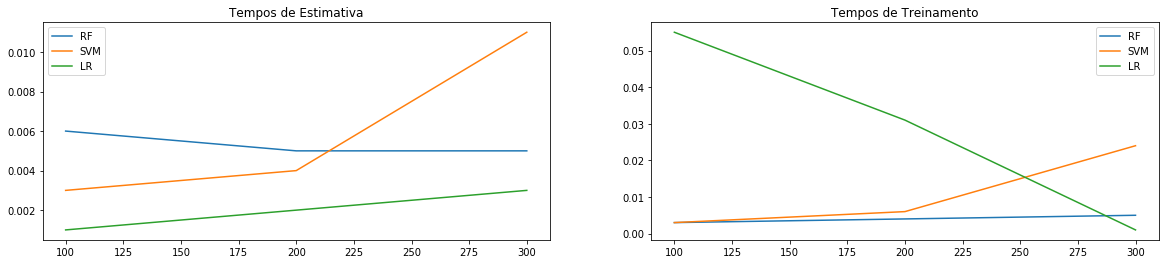

In [27]:
# Plots de desempenho dos Modelos

RF_estimate_time = [0.0060,0.0050,0.0050]
SVC_estimate_time = [0.0030,0.0040,0.0110]
LR_estimate_time = [0.0010,0.0020,0.0030]
RF_training_time = [0.0030,0.0040,0.0050]
SVC_training_time = [0.0030,0.0060,0.0240]
LR_training_time = [0.0550,0.0310,0.0010]
n_points = [100,200,300]
plt.figure()
plt.subplots(1, 2, figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(n_points,RF_estimate_time,label = "RF")
plt.plot(n_points,SVC_estimate_time,label = "SVM")
plt.plot(n_points,LR_estimate_time,label = "LR")
plt.title("Tempos de Estimativa")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(n_points,RF_training_time,label = "RF")
plt.plot(n_points,SVC_training_time,label = "SVM")
plt.plot(n_points,LR_training_time,label = "LR")
plt.title("Tempos de Treinamento")
plt.legend();


**Resposta: ** O modelo escolhido será o de **regressão logística**, por ter apresentado o maior score F1 no conjunto de teste (~ 0.81), com menores tempos de estimativa e teste para o número de pontos que otimiza o desempenho (300). Além disso, o modelo permite o conhecimento dos atributos mais importantes na probabilidade de aprovação de um aluno (explicabilidade vs. *black box*).

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: ** O modelo de regressão logística constrói um sistema automático, que a partir das características coletadas dos alunos de anos passados, calcula a relação existente entre cada uma delas e a probabilidade de ser aprovado. Assim, para cada novo aluno, o sistema busca suas características no banco de dados e estima sua probabilidade de ser aprovado. De posse da probabilidade, cada aluno obtém uma predição sobre seu desempenho no ano acadêmico por vir (aprovado/reprovado).

Como este modelo não apenas prediz quem será aprovado/reprovado, mas também nos indica a força dessa previsão (probabilidade) e o peso relativo de cada característica do aluno na sua aprovação, temos um sistema robusto para discutir intervenções pontuais em características do aluno que possam aumentar sua chance de ser aprovado. Também podemos observar com relativa atenção alunos com previsão fraca de aprovação (probabilidade perto de 50%, por exemplo).


### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

Como utilizaremos penalidades no valor dos coeficientes através dos métodos de *Lasso* e *Ridge*, vamos normalizar os valores dos atributos "age" e "absences", cujas escalas estão em ordem de grandeza diferente das demais, evitando-se assim uma penalização excessiva nos coeficientes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train.loc[:,['age', 'absences']] = scaler.fit_transform(X_train.loc[:,['age', 'absences']])
X_test.loc[:,['age', 'absences']] = scaler.fit_transform(X_test.loc[:,['age', 'absences']])

In [22]:
#Check na normalizacao (max = 1 , min = 0)
print(X_train['age'].max())
print(X_train['age'].min())
print(X_test['age'].max())
print(X_test['age'].min())

1.0
0.0
1.0
0.0


In [14]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.metrics import f1_score, make_scorer,classification_report
from sklearn.model_selection import GridSearchCV

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
parameters = {'penalty' : ['l1','l2'],'C' : np.arange(0.05,10,0.05)}

# TODO: Inicialize o classificador
clf = LogisticRegression(random_state = 42)

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label = "yes")

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(clf,param_grid = parameters,scoring = f1_scorer,cv = 5,verbose = 1)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj.fit(X_train, y_train)

# Get the estimator
clf_fit = grid_obj.best_estimator_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf_fit, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf_fit, X_test, y_test))
print "O melhor estimador encontrado pela busca em grade tem parâmetros:\n {}".format(clf_fit)

Fitting 5 folds for each of 398 candidates, totalling 1990 fits
As previsões foram feitas em 0.0010 segundos.
O modelo calibrado tem F1 de 0.8403 no conjunto de treinamento.
As previsões foram feitas em 0.0020 segundos.
O modelo calibrado tem F1 de 0.8056 no conjunto de teste.
O melhor estimador encontrado pela busca em grade tem parâmetros:
 LogisticRegression(C=0.15000000000000002, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1990 out of 1990 | elapsed:  1.5min finished


In [23]:
CV = pd.DataFrame(grid_obj.cv_results_)
print "A validação cruzada estimou um F1 de {:.4f} para o melhor modelo.".format(CV['mean_test_score'].max())


A validação cruzada estimou um F1 de 0.8386 para o melhor modelo.


A CV exagerou um pouco na previsão do score F1. Um balanceamento melhor das categorias nos dados melhoraria a estimativa?

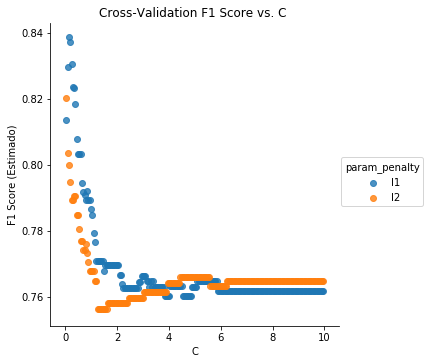

In [16]:
sns.lmplot(x = 'param_C' , y = 'mean_test_score' , data = CV, hue = 'param_penalty' , fit_reg=False,)
plt.title("Cross-Validation F1 Score vs. C ")
plt.ylabel("F1 Score (Estimado)")
plt.xlabel("C");


O gráfico mostra que os melhores modelos estão na região regularizada ( 0 < C < 1), com *penalty* l1 (Lasso).

In [17]:
print(classification_report(y_test,grid_obj.predict(X_test)))

             precision    recall  f1-score   support

         no       0.82      0.26      0.39        35
        yes       0.69      0.97      0.81        60

avg / total       0.74      0.71      0.65        95



O desempenho do modelo na identificação dos alunos que não irão se graduar é **muito ruim** (recall de 0.26). Definitivamente não funcionaria num contexto real.

In [29]:
# Atributos Selecionados pela Regularização Lasso
coeff = clf_fit.coef_[0]
print "Atributos Selecionados e Coeficientes \n"
print "------------------------------------"
nonzero = [(indice,element) for indice,element in enumerate(coeff) if element != 0]
for pos,value in nonzero:
    print "{} : {:.3f}".format(X_train.columns[pos],value)


Atributos Selecionados e Coeficientes 

------------------------------------
Medu : 0.166
studytime : 0.043
failures : -0.616
famsup : -0.006
paid : 0.100
famrel : 0.178
freetime : 0.077
goout : -0.208
Walc : 0.042


Podemos ver que os atributos que mais aumentam a probabilidade do aluno ser aprovado são a qualidade das relações familiares **(*famrel*)** e o nível de escolaridade da mãe **(*Medu*)**. Por outro lado, os atributos que mais afetam negativamente são o número de reprovações passadas **(*failures*)** e a frequência de saída com os amigos **(*goout*)**.

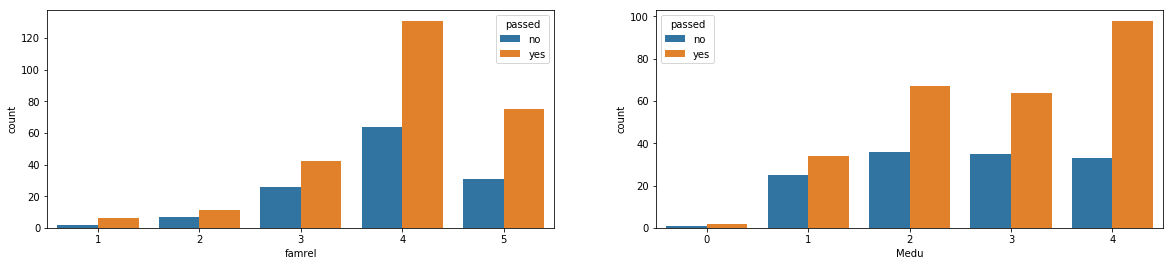

In [19]:
plt.subplots(1, 2, figsize=(20, 4))
plt.subplot(1,2,1)
sns.countplot(data = student_data, x = "famrel", hue = "passed" )
plt.subplot(1, 2, 2)
sns.countplot(data = student_data, x = "Medu", hue = "passed" );

As visualizações confirmam os coeficientes do modelo. Quanto maiores forem ** *famrel* ** e ** *Medu* **, maior a proporção de alunos aprovados para reprovados.

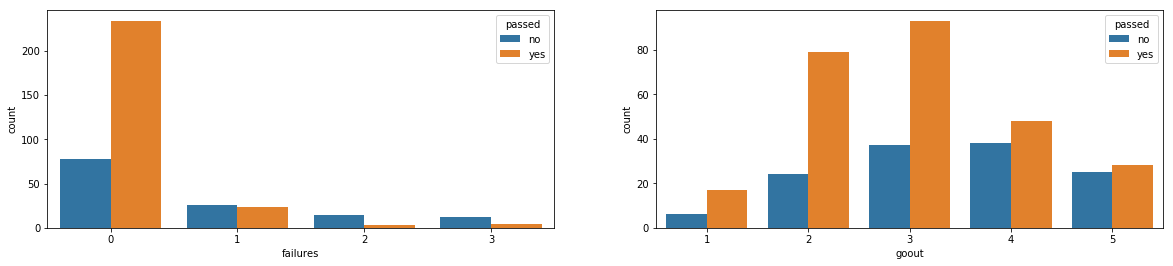

In [20]:
plt.subplots(1, 2, figsize=(20, 4))
plt.subplot(1,2,1)
sns.countplot(data = student_data, x = "failures", hue = "passed" )
plt.subplot(1, 2, 2)
sns.countplot(data = student_data, x = "goout", hue = "passed" );

As visualizações confirmam a relação inversa entre  ** *failures* ** e ** *goout* ** com a proporção de aprovados. O alto coeficiente de ** *failures ** fica bem explícito quando vemos que  a partir do valor "1" neste atributo, a probabilidade de reprovação é maior que a de aprovação.

Creio que vale a tentativa de um ensemble utilizando os 3 classificadores escolhidos para investigar possível melhoria no desempenho de classificação dos dados.

In [24]:
# Ensemble dos 3 classificadores.
from sklearn.ensemble import VotingClassifier
# Ensemble Hard
eclf_hard = VotingClassifier(estimators=[('lr', clf_C), ('rf', clf_A),('svc',clf_B)],voting='hard')
eclf_hard.fit(X_train,y_train)
# Ensemble soft
clf_D = SVC(random_state = 42, probability = True)
eclf_soft = VotingClassifier(estimators=[('lr', clf_C), ('rf', clf_A),('svc',clf_D)],voting='soft')
eclf_soft.fit(X_train,y_train)
print "O modelo {} calibrado tem F1 de {:.4f} no conjunto de teste.".format("eclf_hard",predict_labels(eclf_hard, X_test, y_test))
print "O modelo {} calibrado tem F1 de {:.4f} no conjunto de teste.".format("eclf_soft",predict_labels(eclf_soft, X_test, y_test))

As previsões foram feitas em 0.0180 segundos.
O modelo eclf_hard calibrado tem F1 de 0.8143 no conjunto de teste.
As previsões foram feitas em 0.0150 segundos.
O modelo eclf_soft calibrado tem F1 de 0.8175 no conjunto de teste.


In [25]:
print(classification_report(y_test,eclf_hard.predict(X_test)))

             precision    recall  f1-score   support

         no       0.80      0.34      0.48        35
        yes       0.71      0.95      0.81        60

avg / total       0.74      0.73      0.69        95



In [26]:
print(classification_report(y_test,eclf_soft.predict(X_test)))

             precision    recall  f1-score   support

         no       0.78      0.40      0.53        35
        yes       0.73      0.93      0.82        60

avg / total       0.75      0.74      0.71        95



Um ensemble simples melhorou o desempenho do modelo. Parece promissor.

### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: ** O modelo final tem F1 de 0.84 para treinamento e 0.81 para teste, desempenho semelhante ao modelo não calibrado. A busca em grade demonstrou que os melhores modelos utilizam *penalty* l1 (Lasso) e coeficiente de regularização C entre 0 e 1, que são os parâmetros utilizados no modelo não calibrado ("l1", C = 1.0). Nenhuma surpresa portanto nos *scores* F1 parecidos. Minha conclusão é de que talvez o modelo de *Logistic Regression* seja muito simples para esses dados.Temos indícios de quem um ensemble de alguns modelos produziria um modelo final com melhor capacidade preditiva. 

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.